## Feature Scaling and Transformation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Introduction to Dataset

In [2]:
#import
from sklearn.datasets import fetch_california_housing

In [3]:
#about the dataset
print(fetch_california_housing()["DESCR"])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [4]:
#independent and dependent variables
X, y = fetch_california_housing(as_frame=True, return_X_y=True)

In [5]:
#independent variables
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [6]:
#dependent variable
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [7]:
print(X.shape, "\n")
print(X.columns)

(20640, 8) 

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')


In [8]:
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [9]:
# we will use copy() method to avoid SettingWithCopyWarning
df_scaled=X.copy()

# we will not scale "Lalitude" and "Longitude" columns
col_names = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']
features = df_scaled[col_names]
features

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467
...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209


### Feature Scaling and its Importance

#### Feature Scaling

Feature scaling in machine learning is one of the most critical steps during the pre-processing of data before creating a machine learning model. Scaling can make a difference between a weak machine learning model and a better one.
The most common techniques of feature scaling are Normalization and Standardization.

Normalization is used when we want to bound our values between two numbers, typically, between [0,1] or [-1,1]. While Standardization transforms the data to have zero mean and a variance of 1, they make our data unitless. 

#### Why feature scaling is required?

Oftentimes, we have datasets in which different columns have different units – like one column can be in kilograms, while another column can be in centimeters. Furthermore, we can have columns like income which can range from 20,000 to 100,000, and even more; while an age column which can range from 0 to 100(at the most). Thus, Income is about 1,000 times larger than age.

But how can we be sure that the model treats both these variables equally? When we feed these features to the model as is, there is every chance that the income will influence the result more due to its larger value. But this doesn’t necessarily mean it is more important as a predictor. So, to give importance to both Age, and Income, we need feature scaling.

In addition, many machine learning algorithms utilize mathematical operations which works faster with scaled data.

Some examples of algorithms where feature scaling matters are:

- K-nearest neighbors (KNN) with a Euclidean distance measure is sensitive to magnitudes and hence should be scaled for all features to weigh in equally.

- K-Means uses the Euclidean distance measure here feature scaling matters.

- Scaling is critical while performing Principal Component Analysis(PCA). PCA tries to get the features with maximum variance, and the variance is high for high magnitude features and skews the PCA towards high magnitude features.

- We can speed up gradient descent by scaling because θ descends quickly on small ranges and slowly on large ranges, and oscillates inefficiently down to the optimum when the variables are very uneven.


Algorithms that do not require normalization/scaling are the ones that rely on rules. They would not be affected by any monotonic transformations of the variables. Scaling is a monotonic transformation. Examples of algorithms in this category are all the tree-based algorithms — CART, Random Forests, Gradient Boosted Decision Trees. These algorithms utilize rules (series of inequalities) and do not require normalization.


Algorithms like Linear Discriminant Analysis(LDA), Naive Bayes is by design equipped to handle this and give weights to the features accordingly. Performing features scaling in these algorithms may not have much effect.

The most common techniques of feature scaling are Normalization and Standardization. Normalization is used when we want to bound our values between two numbers, typically, between [0,1] and [-1,1]. While Standardization transforms the data to have zero mean and a variance of 1. In most examples of machine learning models, you would have observed either the Standard Scaler or MinMax Scaler. However, the powerful sklearn library offers many other feature transformations scaling techniques as well, which we can leverage depending on the data we are dealing with.

#### 1. Standardization
The Standard Scaler assumes data is normally distributed within each feature and scales them such that the distribution centered around 0, with a standard deviation of 1. Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. If data is not normally distributed, this is not the best Scaler to use.

z = (x - x_mean) / std

In [10]:
#import
from sklearn.preprocessing import StandardScaler

In [11]:
#instantiate
std_scaler=StandardScaler()

In [12]:
#fit_transform
df_scaled[col_names] = std_scaler.fit_transform(features)
df_scaled

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,37.88,-122.23
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,37.86,-122.22
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,37.85,-122.24
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,37.85,-122.25
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,-1.216128,-0.289187,-0.155023,0.077354,-0.512592,-0.049110,39.48,-121.09
20636,-0.691593,-0.845393,0.276881,0.462365,-0.944405,0.005021,39.49,-121.21
20637,-1.142593,-0.924851,-0.090318,0.049414,-0.369537,-0.071735,39.43,-121.22
20638,-1.054583,-0.845393,-0.040211,0.158778,-0.604429,-0.091225,39.43,-121.32


In [13]:
# notive standard deviation is nearly 1 and mean nearly 0
df_scaled[col_names].describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04
mean,3.734255e-16,8.557001e-16,2.704111e-16,-1.531384e-16,-6.465442e-17,6.064808e-19
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00
min,-1.774299e+00,-2.196180e+00,-1.852319e+00,-1.610768e+00,-1.256123e+00,-2.290000e-01
25%,-6.881186e-01,-8.453931e-01,-3.994496e-01,-1.911716e-01,-5.638089e-01,-6.171062e-02
50%,-1.767951e-01,2.864572e-02,-8.078489e-02,-1.010650e-01,-2.291318e-01,-2.431585e-02
75%,4.593063e-01,6.643103e-01,2.519615e-01,6.015869e-03,2.644949e-01,2.037453e-02
max,5.858286e+00,1.856182e+00,5.516324e+01,6.957171e+01,3.025033e+01,1.194191e+02


In [14]:
# this is our function to plot distribution of features before and after transformation
def plots(df, var, scaler):
    plt.figure(figsize=(13,5))
    
    plt.subplot(121)
    sns.kdeplot(df[var])
    plt.title('before ' + str(scaler))
    
    plt.subplot(122)
    sp2 = scaler.fit_transform(df[[var]]).flatten()
    sns.kdeplot(sp2)
    plt.title('after ' + str(scaler))

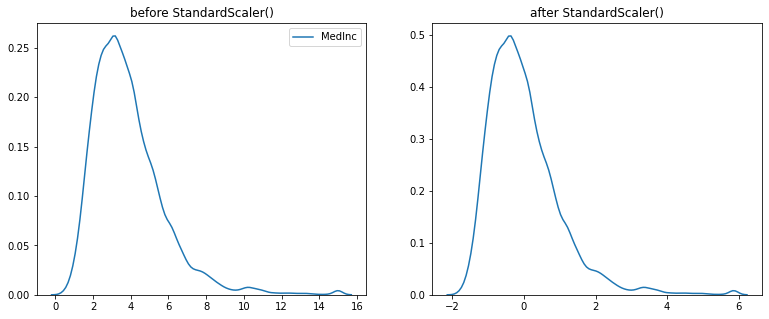

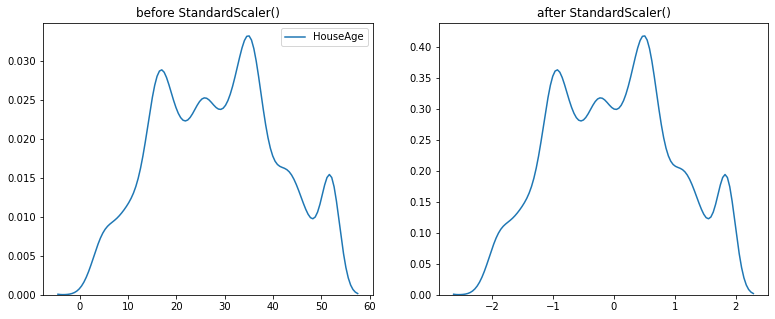

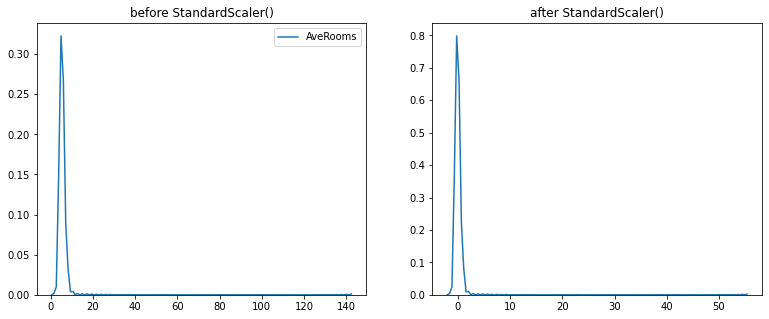

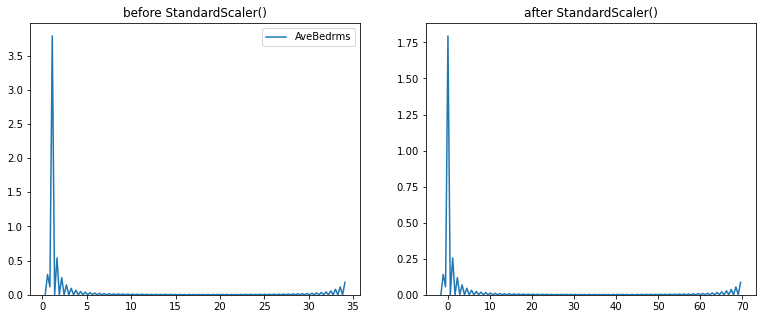

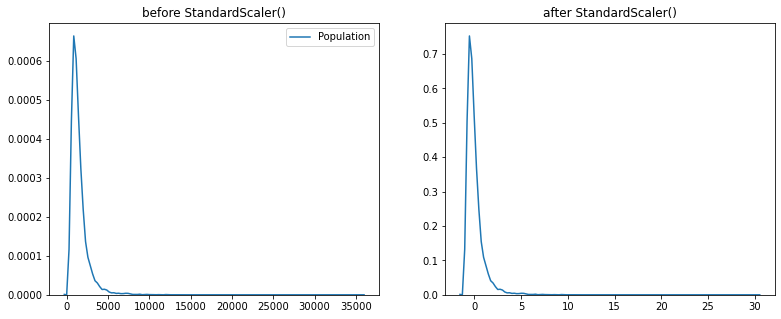

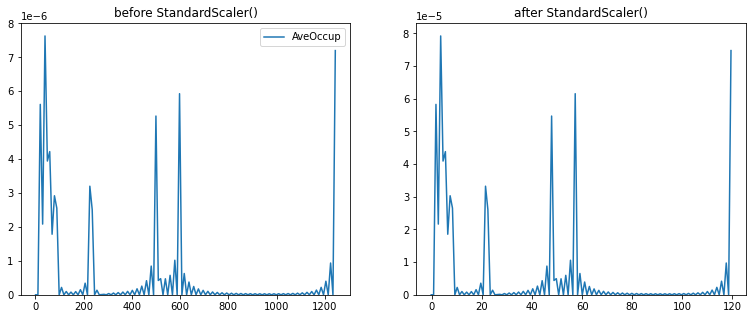

In [15]:
# we will print out the distributions
for col in col_names:
    plots(X, col, StandardScaler())

#### 2. Min-Max Scaling

Min-Max Scaling transforms features by scaling each feature such that it is between zero and one by default, however, we can change the limits. This can be very useful for some ML models like the Multi-layer Perceptrons (MLP), where the back-propagation can be more stable and even faster when input features are min-max scaled (or in general scaled) compared to using the original unscaled data. This Scaler responds well if the standard deviation is small and when a distribution is not Gaussian. This Scaler is sensitive to outliers.

X_scaled = (X - X_min) / (X_max - X_min)

In [16]:
#import
from sklearn.preprocessing import MinMaxScaler

In [17]:
#instantiate
minmax_scaler1 = MinMaxScaler()

In [18]:
#fit_transform
df_scaled[col_names] = minmax_scaler1.fit_transform(features)
df_scaled

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.539668,0.784314,0.043512,0.020469,0.008941,0.001499,37.88,-122.23
1,0.538027,0.392157,0.038224,0.018929,0.067210,0.001141,37.86,-122.22
2,0.466028,1.000000,0.052756,0.021940,0.013818,0.001698,37.85,-122.24
3,0.354699,1.000000,0.035241,0.021929,0.015555,0.001493,37.85,-122.25
4,0.230776,1.000000,0.038534,0.022166,0.015752,0.001198,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,0.073130,0.470588,0.029769,0.023715,0.023599,0.001503,39.48,-121.09
20636,0.141853,0.333333,0.037344,0.029124,0.009894,0.001956,39.49,-121.21
20637,0.082764,0.313725,0.030904,0.023323,0.028140,0.001314,39.43,-121.22
20638,0.094295,0.333333,0.031783,0.024859,0.020684,0.001152,39.43,-121.32


In [19]:
# notice min and max values for each column
df_scaled[col_names].describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,0.232464,0.541951,0.032488,0.022629,0.039869,0.001914
std,0.131020,0.246776,0.017539,0.014049,0.031740,0.008358
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142308,0.333333,0.025482,0.019943,0.021974,0.001398
50%,0.209301,0.549020,0.031071,0.021209,0.032596,0.001711
75%,0.292641,0.705882,0.036907,0.022713,0.048264,0.002084
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


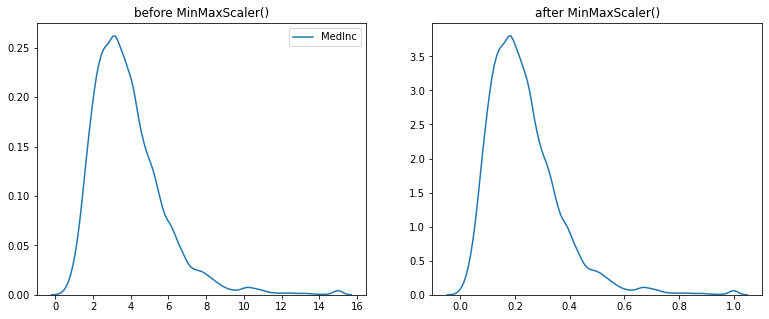

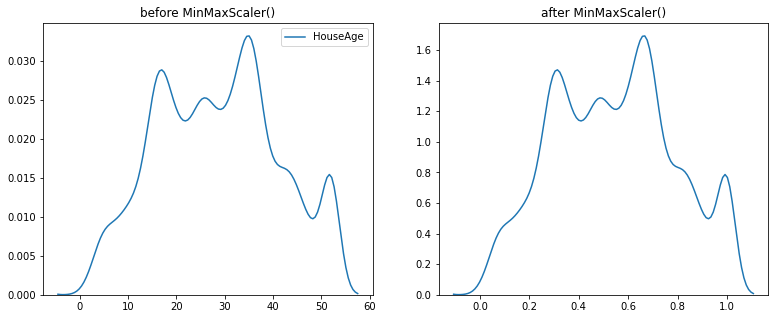

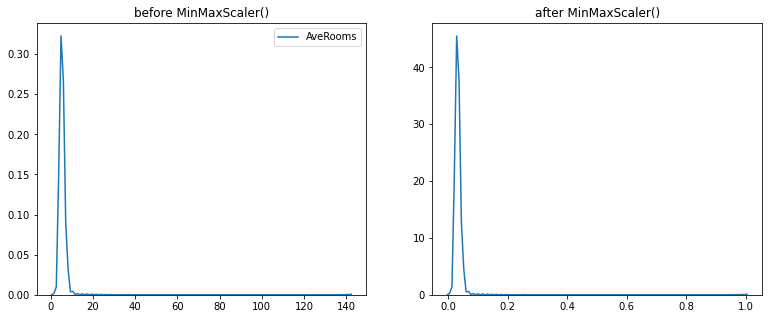

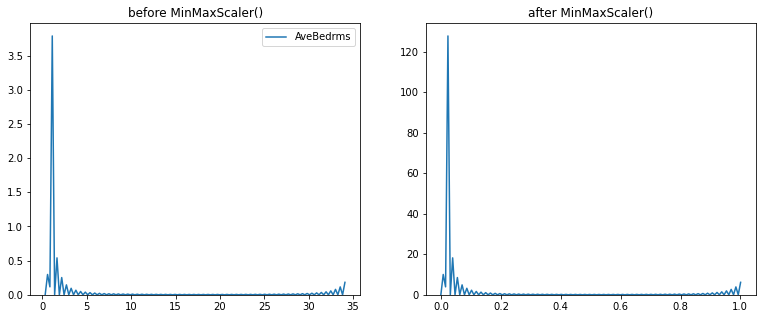

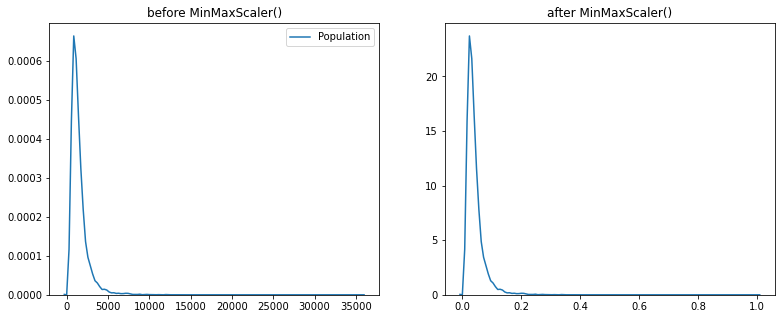

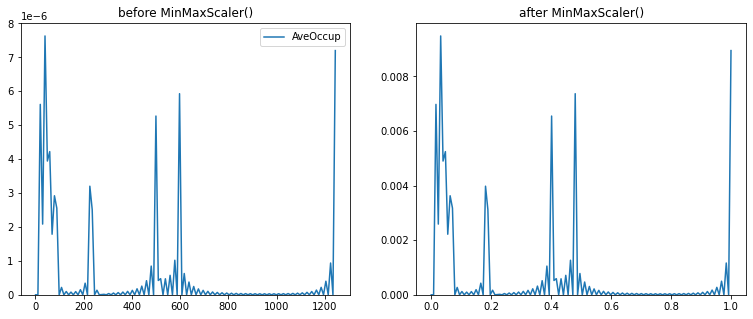

In [20]:
# we will print out the distributions
for col in col_names:
    plots(X, col, minmax_scaler1)

In [21]:
#instantiate
minmax_scaler2 = MinMaxScaler(feature_range=(5, 10))

#fit_transform
df_scaled[col_names] = minmax_scaler2.fit_transform(features)

df_scaled

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,7.698342,8.921569,5.217562,5.102343,5.044704,5.007497,37.88,-122.23
1,7.690135,6.960784,5.191120,5.094646,5.336052,5.005704,37.86,-122.22
2,7.330140,10.000000,5.263782,5.109701,5.069088,5.008490,37.85,-122.24
3,6.773493,10.000000,5.176205,5.109643,5.077777,5.007467,37.85,-122.25
4,6.153881,10.000000,5.192669,5.110832,5.078758,5.005992,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,5.365650,7.352941,5.148845,5.118577,5.117997,5.007517,39.48,-121.09
20636,5.709266,6.666667,5.186721,5.145621,5.049469,5.009780,39.49,-121.21
20637,5.413822,6.568627,5.154519,5.116614,5.140699,5.006572,39.43,-121.22
20638,5.471476,6.666667,5.158913,5.124296,5.103422,5.005758,39.43,-121.32


In [22]:
df_scaled[col_names].describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,6.162319,7.709754,5.162440,5.113144,5.199344,5.009570
std,0.655102,1.233878,0.087697,0.070244,0.158701,0.041790
min,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
25%,5.711542,6.666667,5.127410,5.099715,5.109869,5.006991
50%,6.046503,7.745098,5.155355,5.106045,5.162981,5.008554
75%,6.463204,8.529412,5.184536,5.113566,5.241318,5.010421
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


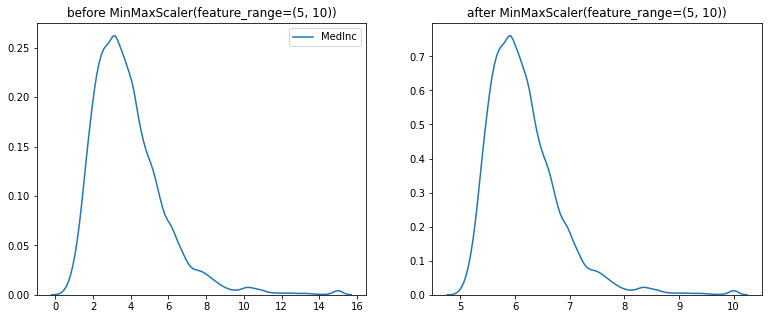

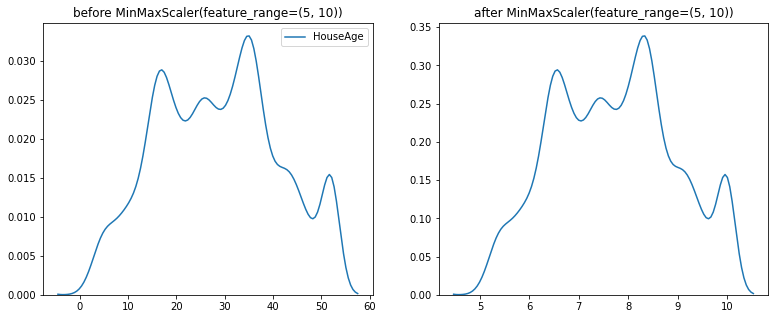

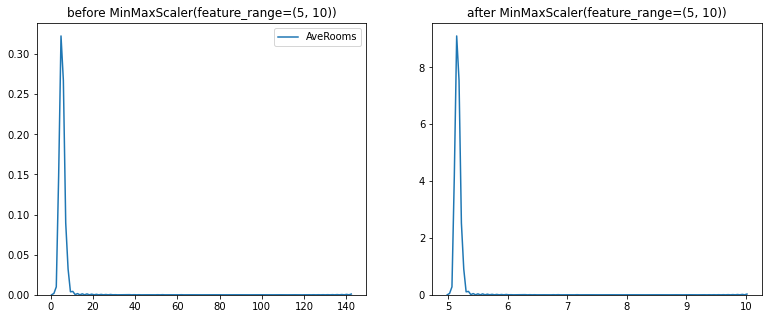

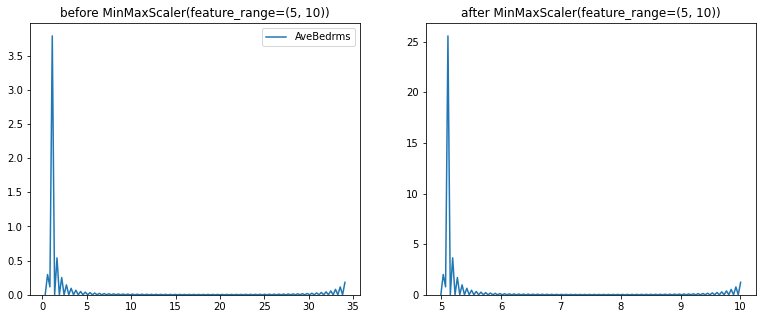

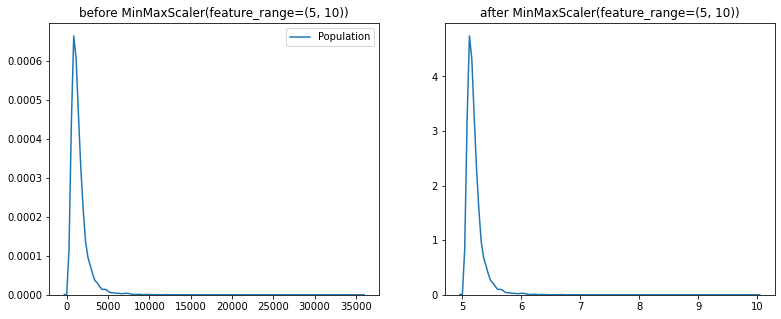

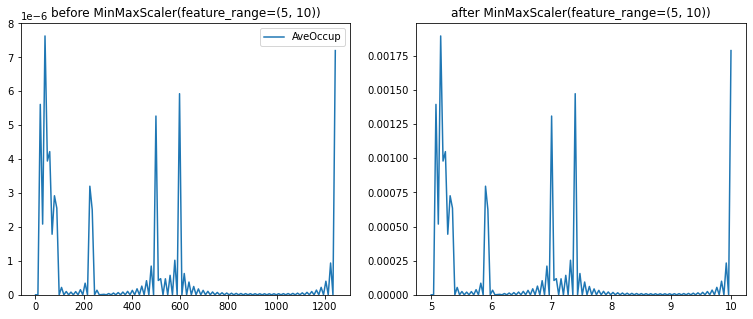

In [23]:
# we will print out the distributions
for col in col_names:
    plots(X, col, minmax_scaler2)

#### 3. Maximum Absolute Scaling

Max Abs Scaler works by dividing each observation by the maximum value in that feature, irrespective of the sign of the observation, i.e. basically by the MAXimum ABSolute (hence the name Max Abs Scaler) value of each feature in a particular feature.Scaled value lies between -1 and 1. On positive-only data, this Scaler behaves similarly to Min Max Scaler and, therefore, also suffers from the presence of significant outliers.

X_scaled = X / |X|_max

In [24]:
#import
from sklearn.preprocessing import MaxAbsScaler

In [25]:
#instantiate
maxabs_scaler = MaxAbsScaler()

In [26]:
#fit_transform
df_scaled[col_names] = maxabs_scaler.fit_transform(features)
df_scaled

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.555010,0.788462,0.049216,0.030053,0.009024,0.002055,37.88,-122.23
1,0.553423,0.403846,0.043959,0.028529,0.067289,0.001697,37.86,-122.22
2,0.483823,1.000000,0.058405,0.031510,0.013901,0.002254,37.85,-122.24
3,0.376204,1.000000,0.040994,0.031499,0.015638,0.002049,37.85,-122.25
4,0.256412,1.000000,0.044267,0.031734,0.015834,0.001755,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,0.104019,0.480769,0.035554,0.033268,0.023681,0.002059,39.48,-121.09
20636,0.170452,0.346154,0.043084,0.038624,0.009977,0.002512,39.49,-121.21
20637,0.113333,0.326923,0.036682,0.032879,0.028222,0.001870,39.43,-121.22
20638,0.124479,0.346154,0.037556,0.034401,0.020767,0.001708,39.43,-121.32


In [27]:
# we will print out the distributions
df_scaled[col_names].describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,0.258043,0.550759,0.038257,0.032192,0.039949,0.002470
std,0.126654,0.242030,0.017435,0.013911,0.031738,0.008353
min,0.033326,0.019231,0.005963,0.009785,0.000084,0.000557
25%,0.170892,0.346154,0.031293,0.029533,0.022056,0.001954
50%,0.235652,0.557692,0.036848,0.030786,0.032678,0.002267
75%,0.316215,0.711538,0.042650,0.032276,0.048344,0.002640
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


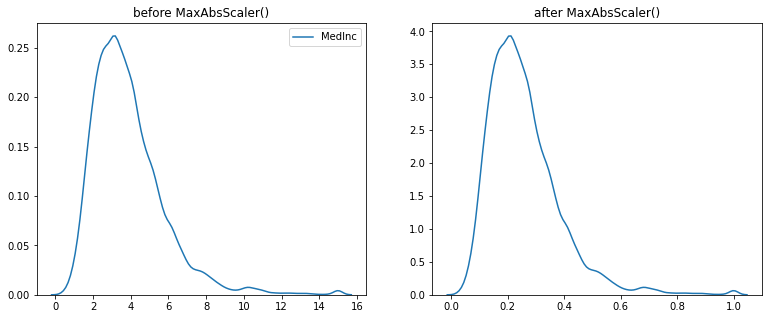

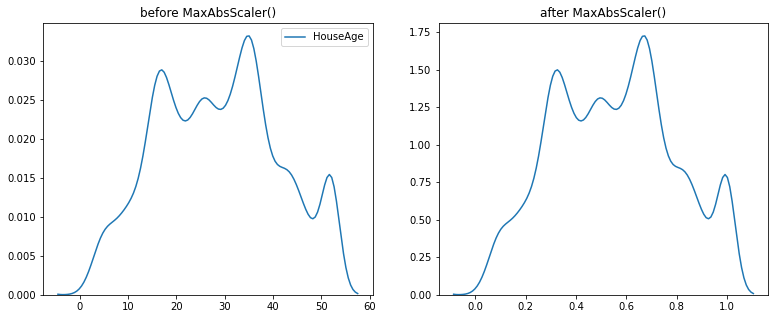

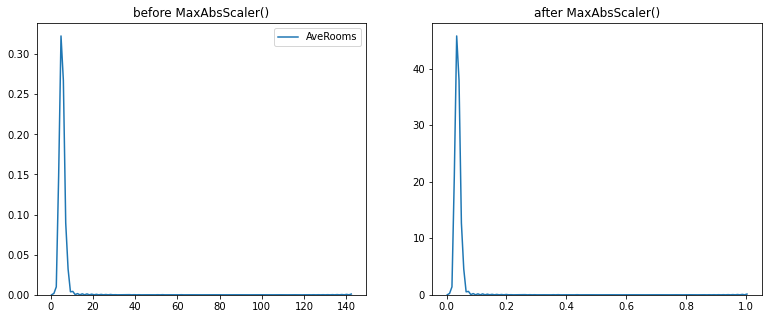

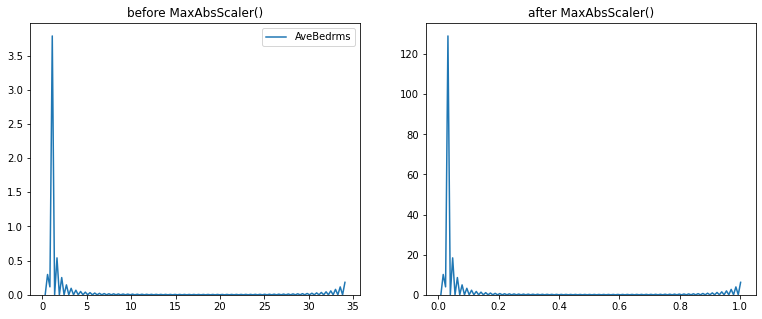

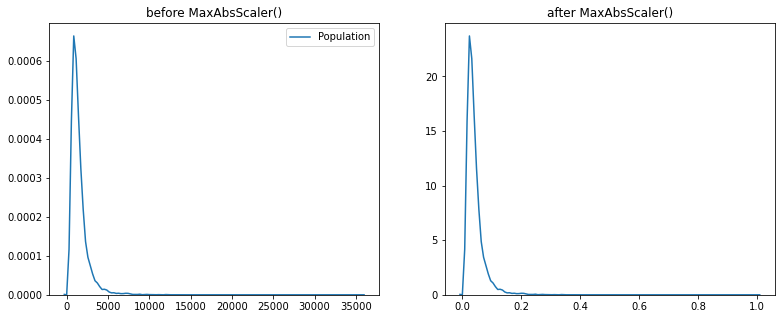

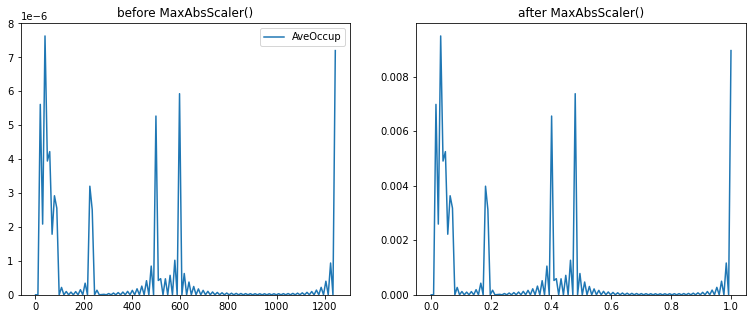

In [28]:
# we will print out the distributions
for col in col_names:
    plots(X, col, maxabs_scaler)

#### 4. Robust Scaler

As the name suggests, this Scaler is robust to outliers. If our data contains many outliers, scaling using the mean and standard deviation of the data won’t work well as both are affected by outliers. This Scaler removes the median and scales the data according to the Interquartile Range. The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile). 

IQR = 75th quantile - 25th quantile

X_scaled = (X - X_median) / IQR

In [29]:
from sklearn.preprocessing import RobustScaler

In [30]:
robust_scaler = RobustScaler()

In [31]:
#fit_transform
df_scaled[col_names] = robust_scaler.fit_transform(features)
df_scaled

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.197582,0.631579,1.088935,-0.267221,-0.899787,-0.307981,37.88,-122.23
1,2.186664,-0.421053,0.626066,-0.822926,1.316631,-0.830800,37.86,-122.22
2,1.707732,1.210526,1.898042,0.263955,-0.714286,-0.018599,37.85,-122.24
3,0.967177,1.210526,0.364978,0.259814,-0.648188,-0.316908,37.85,-122.25
4,0.142854,1.210526,0.653191,0.345657,-0.640725,-0.746784,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,-0.905796,-0.210526,-0.113966,0.904821,-0.342217,-0.302057,39.48,-121.09
20636,-0.448655,-0.578947,0.549064,2.857330,-0.863539,0.357401,39.49,-121.21
20637,-0.841709,-0.631579,-0.014635,0.763126,-0.169510,-0.577676,39.43,-121.22
20638,-0.765007,-0.578947,0.062286,1.317744,-0.453092,-0.815121,39.43,-121.32


In [32]:
df_scaled[col_names].describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
count,2.064000e+04,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,1.540799e-01,-0.018974,0.124015,0.512533,0.276628,0.296227
std,8.715378e-01,0.662398,1.535166,5.071439,1.207316,12.182767
min,-1.392252e+00,-1.473684,-2.719533,-7.656179,-1.239872,-2.493559
25%,-4.456270e-01,-0.578947,-0.489191,-0.456959,-0.404051,-0.455561
50%,1.018608e-16,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.543730e-01,0.421053,0.510809,0.543041,0.595949,0.544439
max,5.259674e+00,1.210526,84.806698,353.332681,36.797441,1455.116059


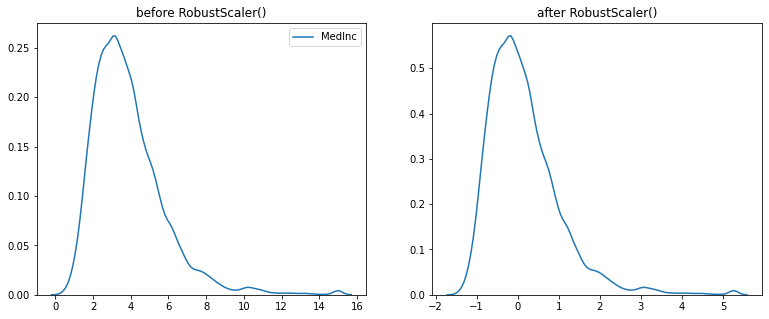

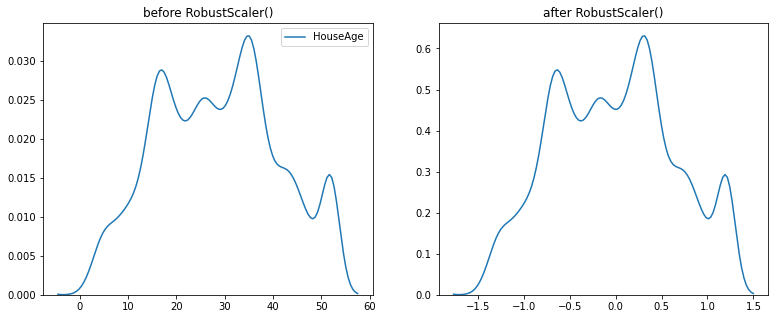

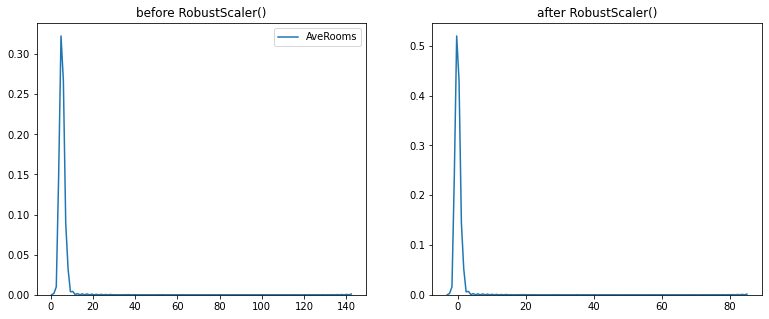

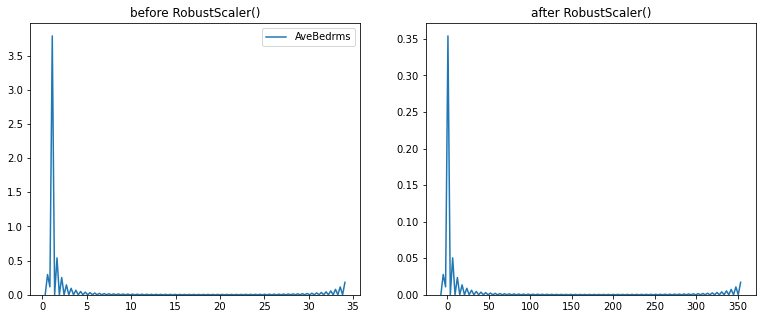

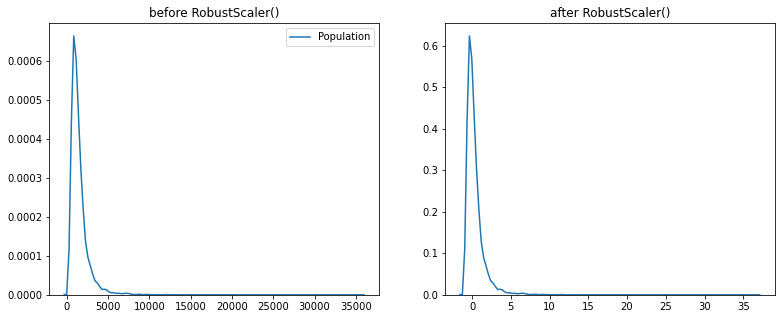

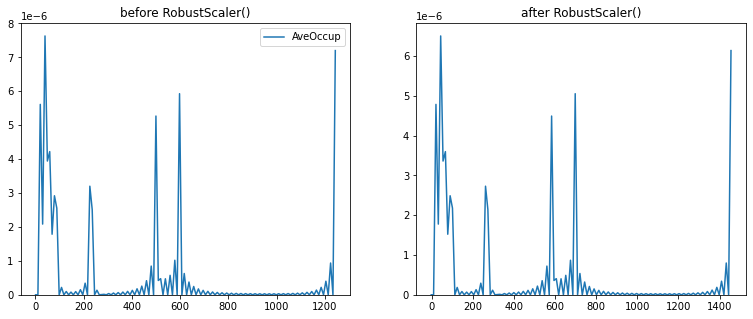

In [33]:
# we will print out the distributions
for col in col_names:
    plots(X, col, robust_scaler)

### Feature Transformation through scaling and its Importance

#### Feature Transformation through Scaling

We have already learned about changing categorical variables to numeric variables to aid in machine learning problems. Changing categorical features to numeric is a type of feature transformation. Changing the distribution to values in a feature through scaling is another. Most often feature transformation through scaling is about changing a skewed distribution to a normal distribution/less-skewed distribution and that will be our focus too.

#### Why feature Transformation through Scaling is required?

Some machine learning algorithms like linear and logistic regression assumes that the features are normally distributed. To improve accuracy and performance of such models, feature transformation can be helpful.

#### 5. Logarithmic Transformation

The Log Transform is one of the most popular Transformation techniques out there. It is primarily used to convert a right skewed distribution to a normal distribution/less-skewed distribution. In this transform, we take the log of the values in a column and use these values as the column instead.

##### Why does it work? 

It is because the log function is equipped to deal with large numbers.

log(10) = 1

log(100) = 2, and

log(10000) = 4.

A small caveat though – if our data has negative values or values ranging from 0 to 1, we cannot apply log transform directly – since the log of negative numbers and numbers between 0 and 1 is undefined, we would get error or NaN values in our data. In such cases, we can add a number to these values to make them all greater than 1. Then, we can apply the log transform.

log1p(x) = log(1+x)

In [34]:
#import
from sklearn.preprocessing import FunctionTransformer

In [35]:
#instantiate
log_tranformer = FunctionTransformer(np.log1p)

In [36]:
#fit_transform
df_scaled[col_names] = log_tranformer.fit_transform(features)
df_scaled

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.232720,3.737670,2.077455,0.704982,5.777652,1.268511,37.88,-122.23
1,2.230165,3.091042,1.979364,0.678988,7.784057,1.134572,37.86,-122.22
2,2.111110,3.970292,2.228738,0.729212,6.208590,1.335596,37.85,-122.24
3,1.893579,3.970292,1.919471,0.729025,6.326149,1.266369,37.85,-122.25
4,1.578195,3.970292,1.985385,0.732888,6.338594,1.157342,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,0.940124,3.258097,1.799307,0.757686,6.740519,1.269931,39.48,-121.09
20636,1.268861,2.944439,1.962070,0.839751,5.877736,1.416534,39.49,-121.21
20637,0.993252,2.890372,1.825443,0.751460,6.915723,1.201661,39.43,-121.22
20638,1.053336,2.944439,1.845223,0.775611,6.609349,1.138861,39.43,-121.32


In [37]:
df_scaled[col_names].describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,1.516995,3.272124,1.828722,0.732035,7.025503,1.351645
std,0.358677,0.531070,0.231938,0.105412,0.736238,0.207530
min,0.405398,0.693147,0.613104,0.287682,1.386294,0.526093
25%,1.270715,2.944439,1.693911,0.696182,6.669498,1.232485
50%,1.511781,3.401197,1.829236,0.717245,7.062192,1.339757
75%,1.748025,3.637586,1.953365,0.741712,7.453562,1.454481
max,2.772595,3.970292,4.962209,3.557251,10.482430,7.126355


In [38]:
# we will add a new plotting funtion with some minor changes 
# we will be using both, so note the difference in name
def plots2(df, var, t):
    plt.figure(figsize=(13,5))
    
    plt.subplot(121)
    sns.kdeplot(df[var])
    plt.title('before ' + str(t).split('(')[0])
    
    plt.subplot(122)
    sp2 = t.fit_transform(df[var])
    sns.kdeplot(sp2)
    plt.title('after ' + str(t).split('(')[0])

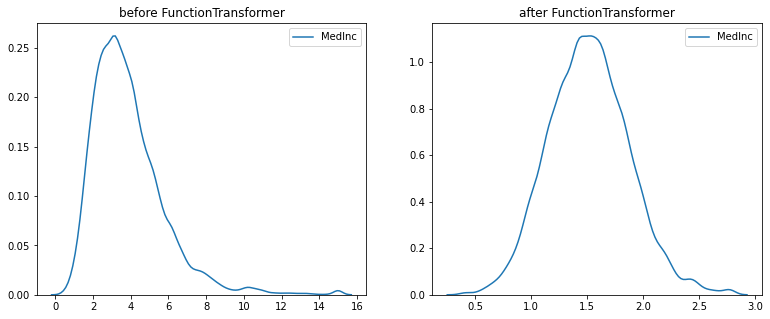

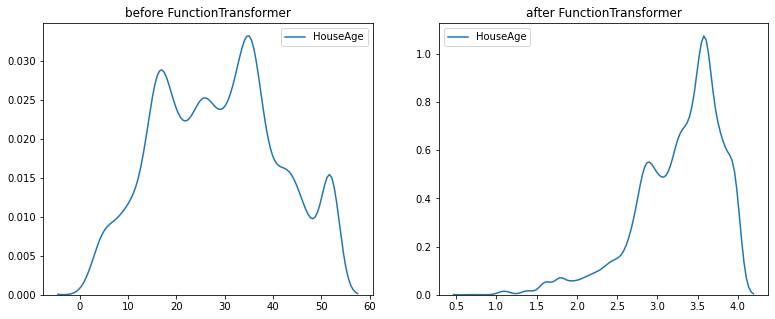

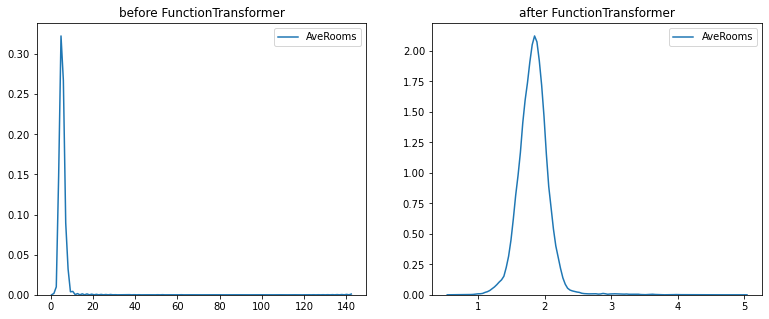

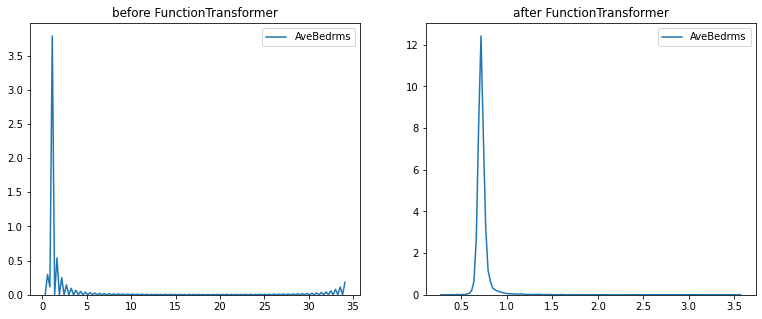

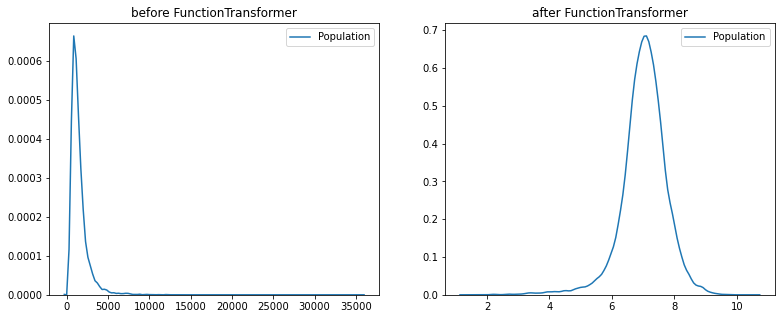

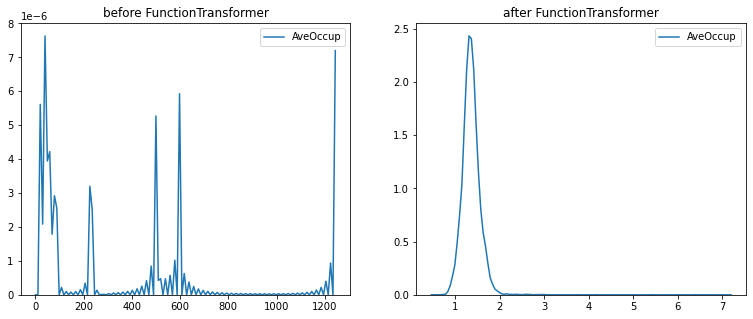

In [39]:
# we will print out the distributions
for col in col_names:
    plots2(X, col, log_tranformer)

#### 6. Exponential Transformation

We can also use exponents like square root, square, reciprocal, etc to tranform our data and check the distribution. In the example below we will carry out reciprocal transpoermation i.e. to the power -1.

In [40]:
#import
from sklearn.preprocessing import FunctionTransformer

In [41]:
#instantiate
reciprocal_tranformer = FunctionTransformer(lambda x: x**(-1))

In [42]:
#fit_transform
df_scaled[col_names] = reciprocal_tranformer.fit_transform(features)
df_scaled

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.120117,0.024390,0.143182,0.976744,0.003106,0.391304,37.88,-122.23
1,0.120462,0.047619,0.160304,1.028933,0.000416,0.473969,37.86,-122.22
2,0.137790,0.019231,0.120654,0.931579,0.002016,0.356855,37.85,-122.24
3,0.177208,0.019231,0.171900,0.931915,0.001792,0.392473,37.85,-122.25
4,0.259997,0.019231,0.159189,0.925000,0.001770,0.458407,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,0.640902,0.040000,0.198198,0.882353,0.001183,0.390533,39.48,-121.09
20636,0.391114,0.055556,0.163558,0.760000,0.002809,0.320225,39.49,-121.21
20637,0.588235,0.058824,0.192103,0.892784,0.000993,0.429990,39.43,-121.22
20638,0.535561,0.055556,0.187634,0.853301,0.001350,0.470985,39.43,-121.32


In [43]:
df_scaled[col_names].describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,0.322929,0.049063,0.199597,0.941884,0.001398,0.364254
std,0.171923,0.048001,0.056030,0.112630,0.004672,0.093364
min,0.066666,0.019231,0.007047,0.029354,0.000028,0.000804
25%,0.210826,0.027027,0.165224,0.909483,0.000580,0.304668
50%,0.282901,0.034483,0.191236,0.953488,0.000858,0.354847
75%,0.390107,0.055556,0.225189,0.993958,0.001271,0.411566
max,2.000400,1.000000,1.181818,3.000000,0.333333,1.444444


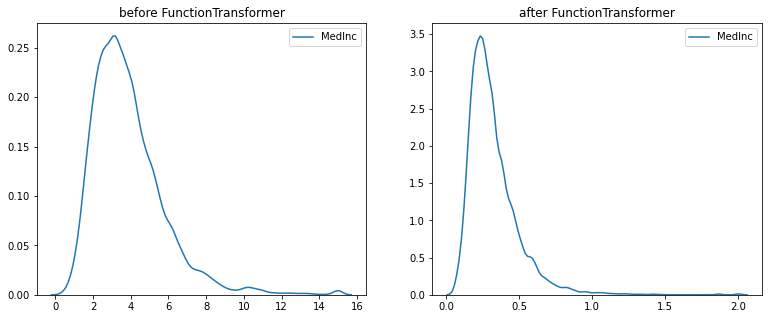

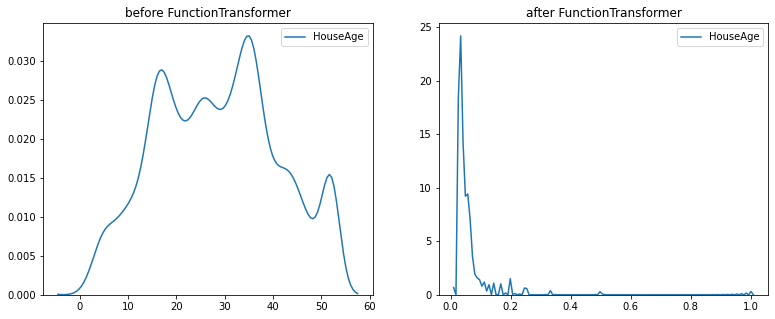

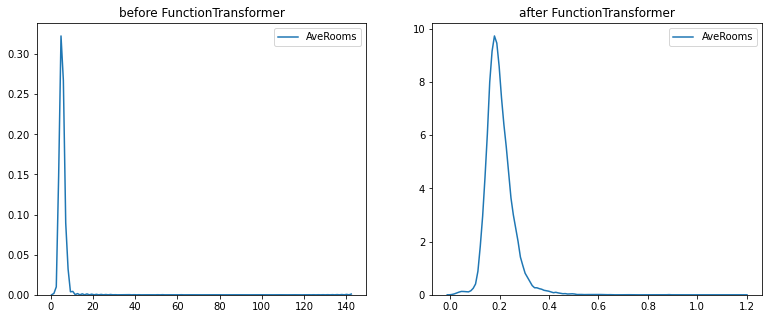

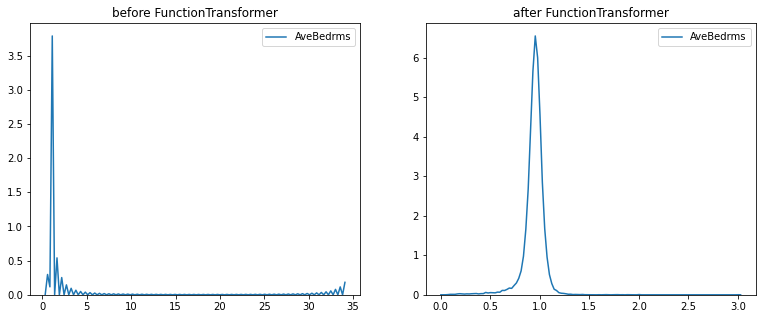

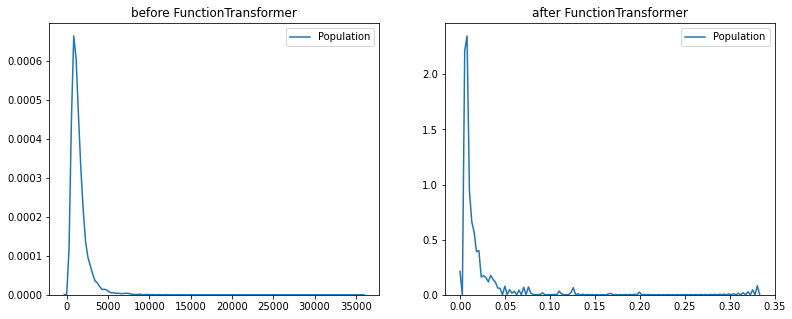

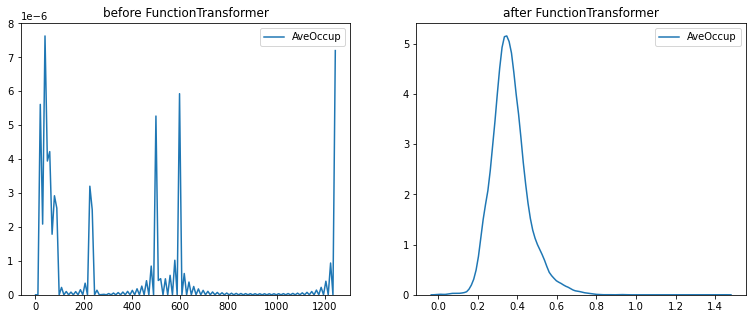

In [44]:
# we will print out the distributions
for col in col_names:
    plots2(X, col, reciprocal_tranformer)

#### 7. Quantile Transformation

This method transforms the features to follow a uniform or a normal
distribution. Therefore, for a given feature, this transformation tends
to spread out the most frequent values. It also reduces the impact of
(marginal) outliers: this is therefore a robust preprocessing scheme.

The transformation is applied on each feature independently. First an
estimate of the cumulative distribution function of a feature is
used to map the original values to a uniform distribution. The obtained
values are then mapped to the desired output distribution using the
associated quantile function. Features values of new/unseen data that fall
below or above the fitted range will be mapped to the bounds of the output
distribution. 

Note that this transform is non-linear. It may distort linear
correlations between variables measured at the same scale but renders
variables measured at different scales more directly comparable.This is also sometimes called as Rank scaler.

In [45]:
#import
from sklearn.preprocessing import QuantileTransformer

In [46]:
quantile_transformer = QuantileTransformer(output_distribution='normal')

In [47]:
#fit_transform
df_scaled[col_names] = quantile_transformer.fit_transform(features)
df_scaled

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,1.919185,0.912774,1.294622,-0.388543,-1.697037,-0.450080,37.88,-122.23
1,1.914418,-0.479432,0.822470,-1.197835,1.191955,-1.229273,37.86,-122.22
2,1.630171,5.199338,1.933184,0.352143,-1.315958,-0.028306,37.85,-122.24
3,1.083447,5.199338,0.495717,0.346959,-1.174755,-0.465169,37.85,-122.25
4,0.193151,5.199338,0.852294,0.452858,-1.164444,-1.109257,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,-1.687093,-0.241963,-0.157039,0.997920,-0.554690,-0.441390,39.48,-121.09
20636,-0.681975,-0.692715,0.723590,1.731979,-1.626344,0.467574,39.49,-121.21
20637,-1.499806,-0.793602,-0.018879,0.882025,-0.252311,-0.864646,39.43,-121.22
20638,-1.318993,-0.692715,0.082100,1.276061,-0.774833,-1.207805,39.43,-121.32


In [48]:
df_scaled[col_names].describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,0.004036,0.199310,-0.000096,-0.000134,-0.000111,-0.000094
std,1.024356,1.541750,0.999724,0.999754,0.999826,0.999478
min,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
25%,-0.675278,-0.692715,-0.674245,-0.674433,-0.675277,-0.674778
50%,-0.000163,0.015055,0.000073,0.000687,-0.000117,-0.000359
75%,0.674159,0.665852,0.674208,0.674336,0.674752,0.674904
max,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338


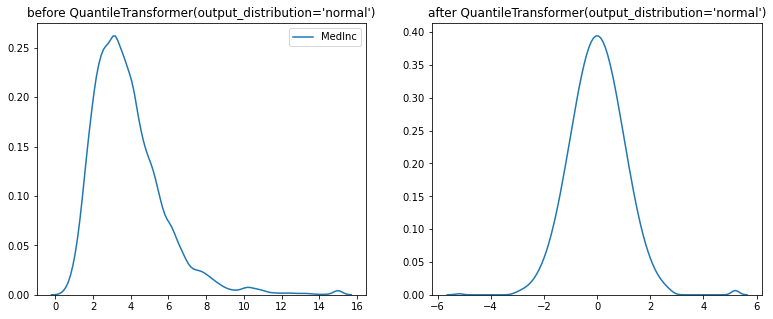

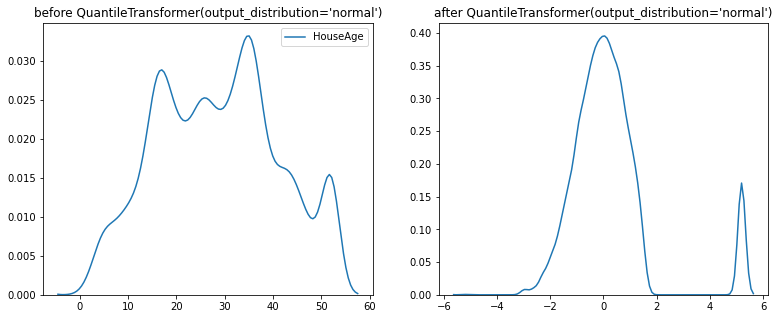

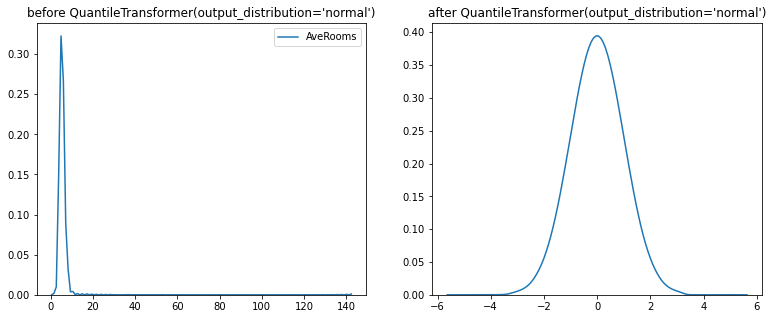

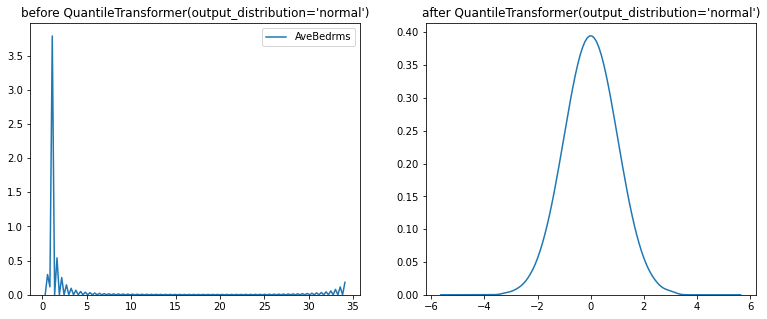

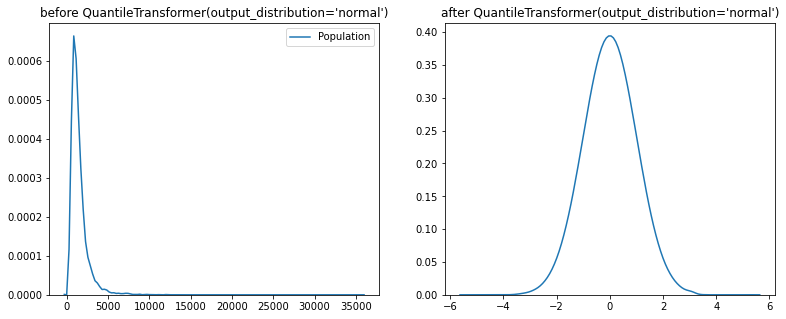

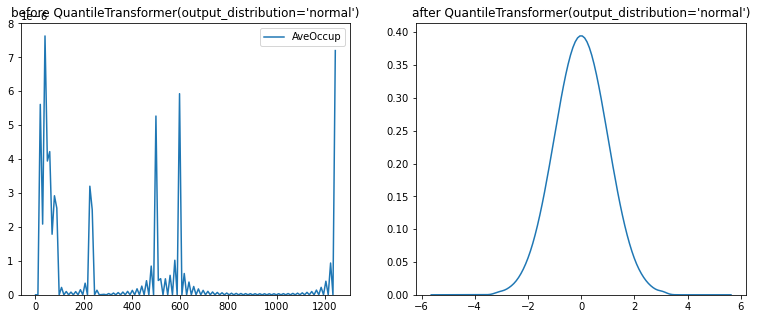

In [49]:
# we will print out the distributions
for col in col_names:
    plots(X, col, quantile_transformer)

#### 8. Power Transformation

Power transforms are a family of parametric, monotonic transformations
that are applied to make data more Gaussian-like. This is useful for
modeling issues related to heteroscedasticity (non-constant variance),
or other situations where normality is desired.

Currently, PowerTransformer supports the Box-Cox transform and the
Yeo-Johnson transform. The optimal parameter for stabilizing variance and
minimizing skewness is estimated through maximum likelihood.

Box-Cox requires input data to be strictly positive, while Yeo-Johnson
supports both positive or negative data.

By default, zero-mean, unit-variance normalization is applied to the
transformed data.

In [50]:
#import
from sklearn.preprocessing import PowerTransformer

In [51]:
power_transformer = PowerTransformer(method='box-cox')

In [52]:
#fit_transform
df_scaled[col_names] = power_transformer.fit_transform(features)
df_scaled

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,1.916290,0.975223,1.089474,-0.289009,-1.618362,-0.353862,37.88,-122.23
1,1.909694,-0.566735,0.700008,-0.797407,1.090062,-1.172198,37.86,-122.22
2,1.601978,1.757447,1.655264,0.137412,-1.139047,0.013813,37.85,-122.24
3,1.035967,1.757447,0.452580,0.134288,-0.999677,-0.366032,37.85,-122.25
4,0.198026,1.757447,0.724468,0.198463,-0.984697,-1.024226,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,-1.662622,-0.241525,-0.068017,0.587575,-0.476623,-0.345814,39.48,-121.09
20636,-0.662998,-0.818423,0.629341,1.638479,-1.511308,0.425788,39.49,-121.21
20637,-1.492264,-0.904051,0.048112,0.493475,-0.239693,-0.747072,39.43,-121.22
20638,-1.304363,-0.818423,0.134901,0.845986,-0.647731,-1.144024,39.43,-121.32


In [53]:
df_scaled[col_names].describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04
mean,-3.110561e-16,-2.027292e-15,5.478895e-16,-4.713607e-17,8.249081e-17,2.493941e-16
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00
min,-3.802568e+00,-2.529882e+00,-8.872978e+00,-3.028537e+01,-4.604152e+00,-7.740242e+00
25%,-6.576616e-01,-8.184230e-01,-5.540728e-01,-4.548529e-01,-5.699224e-01,-5.622282e-01
50%,1.736557e-02,7.387215e-02,6.482922e-02,-6.785676e-02,-3.399794e-02,3.580411e-02
75%,6.526430e-01,6.812072e-01,5.935370e-01,3.413781e-01,5.516882e-01,6.082020e-01
max,3.309825e+00,1.757447e+00,7.828665e+00,5.436999e+00,7.474977e+00,7.758216e+00


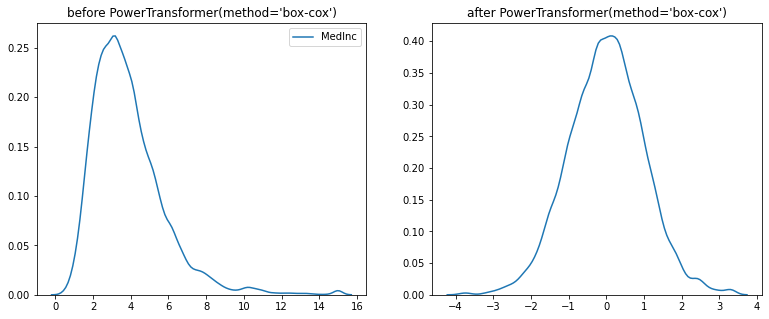

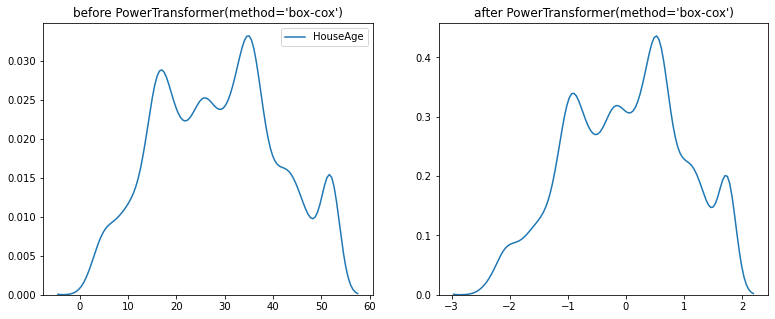

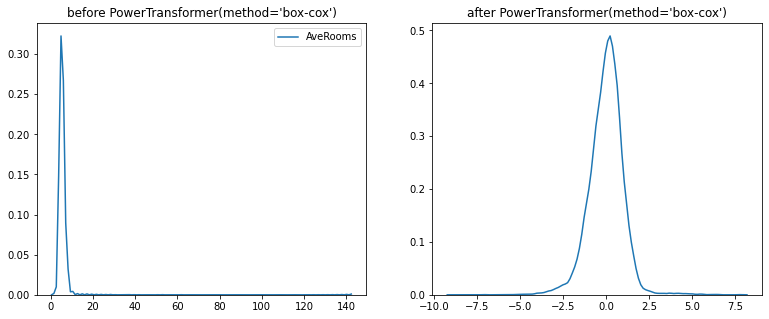

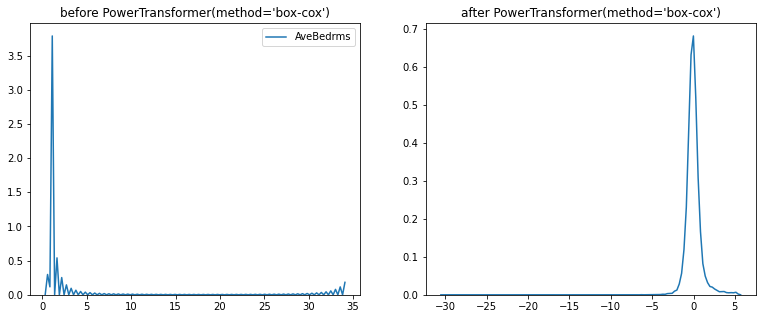

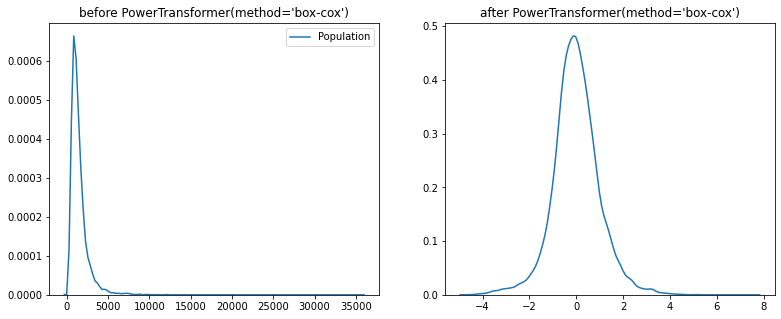

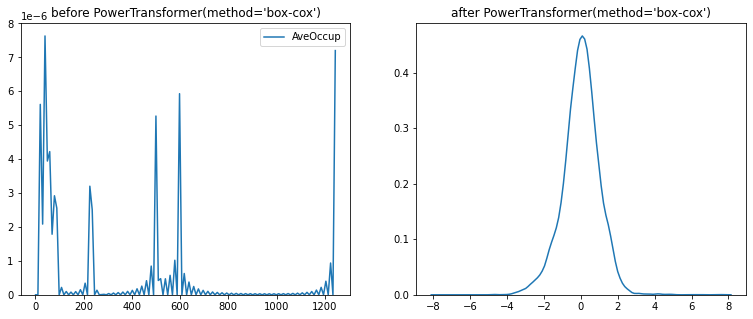

In [54]:
# we will print out the distributions
for col in col_names:
    plots(X, col, power_transformer)